# Wind Turbine Power Production
###  Project assessment
#### [Machine Learning and Statistics Module GMIT 2020 ]

---

<img align="left" width="300" src="https://image.flaticon.com/icons/png/512/1778/1778210.png">
<br>

<br>

Lecturer: *Ian McLoughlin (https://github.com/ianmcloughlin)*

Completed by: *Olga Rozhdestvina (G00387844@gmit.ie)*

---

## Table of Contents

* [Overview](#overview)
* [General Setup](#setup)
* [Raw Data](#loading_data)
* [Data Pre-processing](#preproccesing)
    * [Outliners](#outliners)
    * [Creating Arrays for the Speed and the Power Variable](#arrays)
    * [Creating the Training and Test Datasets](#split)
* [Build, Predict, and Evaluate the Models](#models)
    * [Linear Regression with Polynomial Features](#lr)
    * [](#)
    * [Neural Networks](#nn)

<br>

### Overview. <a name="overview"></a>
___

<br>

### General Setup. <a name="setup"></a>
___

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Preprocessing
from sklearn.model_selection import train_test_split as tts
import sklearn.linear_model as md
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
# Another package for plotting.
import seaborn as sns

%matplotlib inline

In [2]:
# Theme for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5, )

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

### Raw Data. <a name="loading_data"></a>
___

> [1] [Adjusting Size of Seaborn Plot](https://stackoverflow.com/questions/51502927/adjusting-size-of-seaborn-plot)

In [3]:
# Load the iris data set from a URL.
df = pd.read_csv("powerproduction.csv")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has two numerical variables **speed** and **power**. They are both represented by real numbers: speed to 3 decimal points and power to one decimal point. Let's check if the data set has any empty values. 

In [4]:
# Check for empty values.
df.isnull().values.any()

False

In [5]:
# Stats.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


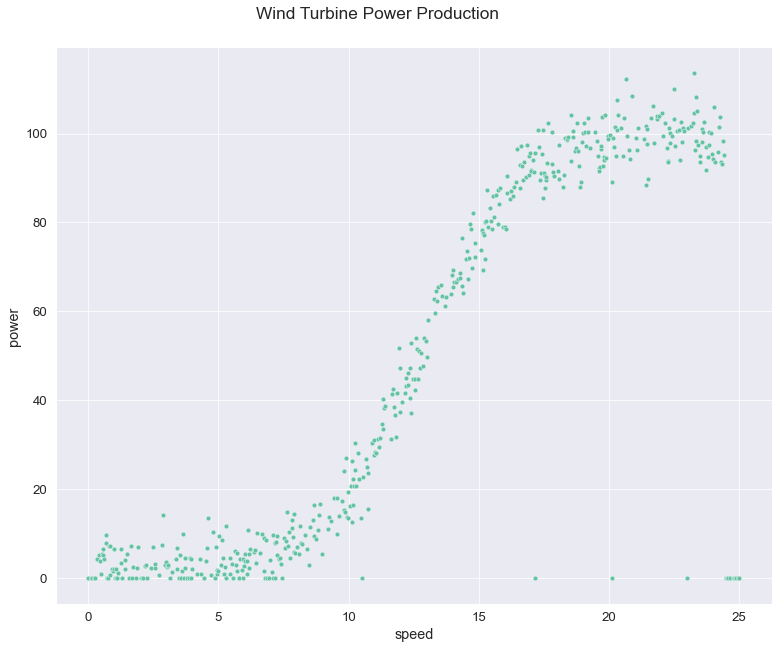

In [6]:
# Plot data.
sns.relplot(data=df, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.suptitle("Wind Turbine Power Production", y=1.02)

# Show the plot.
plt.show()

The above plot shows that the data follows a polynominal regression. The relationship between Power and Speed predominantly take "S"-shape. The power rises dramatically with speed over about 8 m/s and slows when the speed reaches about 17 m/s.

Additionally, we can see some outliners where the speed is above 10 m/s, however, the power is still 0.

<br>

###  Data Pre-processing. <a name="preproccesing"></a>
___

#### 1. Outliners.  <a name="outliners"></a>
The first step is to remove those outliners from our data set. [2] [3]

> [2] [Non-Linear Regression Trees with scikit-learn](https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn)
<br>
[3] [Delete rows based on multiple conditions; including other column conditionals](https://stackoverflow.com/questions/31997992/delete-rows-based-on-multiple-conditions-including-other-column-conditionals)

In [7]:
# Remove outliners.
df_new = df.drop(df[(df.power == 0) & (df.speed > 5)].index)

# Display cleaned data set.
df_new

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


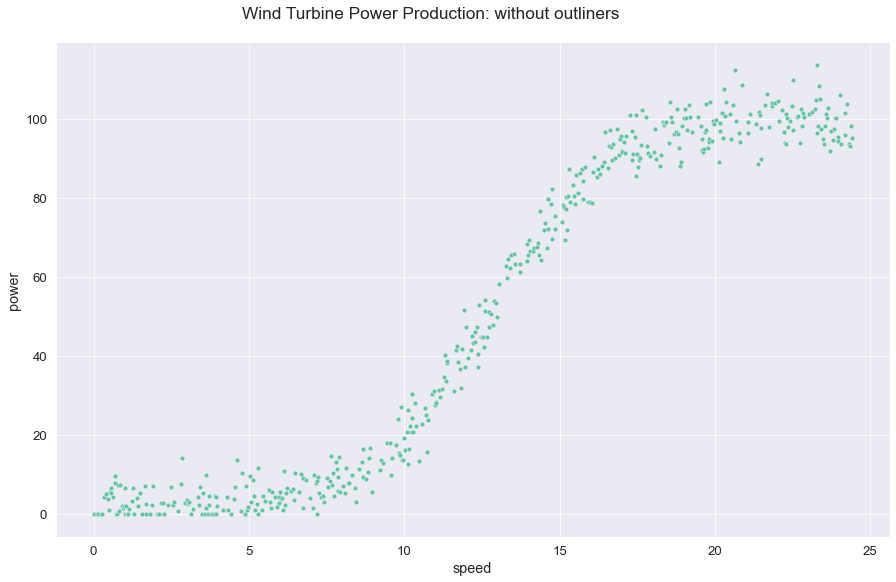

In [8]:
# Plot data.
sns.relplot(data=df_new, x="speed", y="power")

# Change plot size.
fig = plt.gcf()
fig.set_size_inches(14, 8)
fig.suptitle("Wind Turbine Power Production: without outliners", y=1.02)

# Show the plot.
plt.show()

<br>

#### 2. Creating Arrays for the Speed and the Power Variable.  <a name="arrays"></a>

Now the data set should be separated for speed and power values. 
>[5][Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Separate speed and power.
speed = df_new.iloc[:, 0].values
power = df_new.iloc[:, 1].values

# Convert them into a numpy array.
X = np.array(speed).reshape(-1,1)
y = np.array(power).reshape(-1,1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

<br>

#### 3. Creating the Training and Test Datasets.  <a name="split"></a>

We will build our model on the training set and evaluate its performance on the test set. 

In [11]:
# Split data on training and test (add random state so the outputs are the same after each execution).
speed_train, speed_test, power_train, power_test = tts(X, y, test_size=0.3, random_state=1)

In [12]:
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")

Training set: (333, 1), (333, 1)
Test set: (144, 1), (144, 1)


<br>

### Build, Predict, and Evaluate the Models. <a name="models"></a>

<br>

#### Linear Regression with Polynomial Features.  <a name="lr"></a>
___

<br>

Since we have Polynomial regression we can apply the first step is to apply polynomial features. In oder to do so we need first find the best fitting degree. [4]

>[4] [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

In [13]:
# Find the best degree (over 6 causes overfitting of data).
for degree in range(1,6):
    # Create a pipeline.
    pipeline = make_pipeline(PolynomialFeatures(degree), md.LinearRegression())
    # Fit it to the original data.
    pipeline.fit(X, y)
    print(f'{degree}: {pipeline.score(X,y)}')

1: 0.903329461053929
2: 0.9051963072726177
3: 0.9785340997342342
4: 0.9798979555477244
5: 0.9883718320837764


<br>
The results found that the degree 5 scores the best. Now we can create a model and fit it to our data. Additionally, we should calculate Mean Squared Error to evaluate the model. [5]

>[5] [Model evaluation: quantifying the quality of predictions](https://scikit-learn.org/0.15/modules/model_evaluation.html)

In [14]:
# Create a pipeline with 5 degrees.
pipeline = make_pipeline(PolynomialFeatures(5), md.LinearRegression())

# Fit the model to the original data.
pipeline.fit(X, y)

# Predict y.
y_train_pred = pipeline.predict(X)

# Calculate mse.
print("MSE: ", mean_squared_error(y,y_train_pred))
print("Score:", r2_score(y,y_train_pred))

MSE:  0.0015285945509408675
Score: 0.9883718320837764


<br> 

Let's see how the model fits our original data set on the plot.

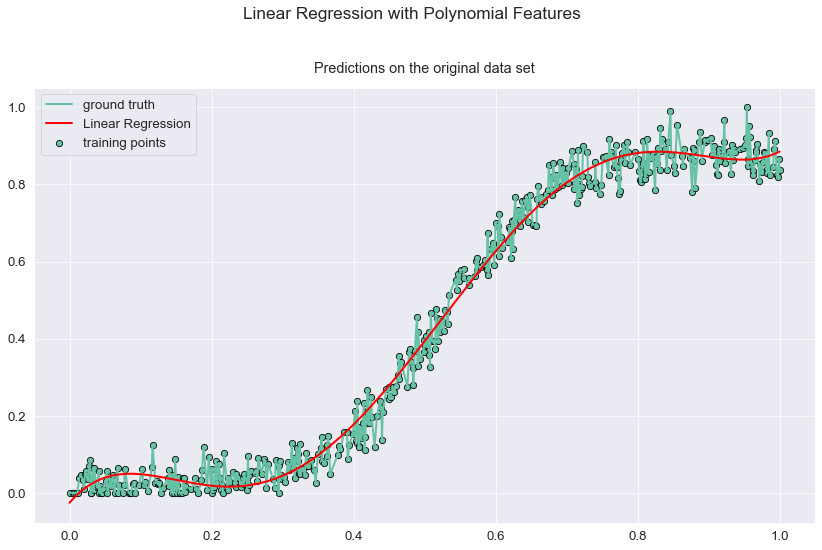

In [15]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Linear Regression with Polynomial Features", y=1.02)
ax.set_title("Predictions on the original data set",y=1.02)

# Plot training points and line connecting them.
ax.plot(X, y, linewidth=2, label="ground truth")
ax.scatter(X, y, s=40, edgecolors="black", label="training points")

# Plot predictions.
ax.plot(X, y_train_pred, c="red", linewidth=2, label="Linear Regression")
    
# Show legend.
plt.legend(loc='upper left')

# Show the plot.
plt.show()

<br>

Now that we have the model created, we can fit it on the training data, make predictions on the test data and plot them. 

In [16]:
# Fit the model on the training data.
pipeline.fit(speed_train, power_train)

# Predict power from test speed.
y_test_pred = pipeline.predict(speed_test)

# Calculate a score and mse.
print("MSE: ", mean_squared_error(power_test,y_test_pred))
print("Score:", r2_score(power_test,y_test_pred))

MSE:  0.0015213520519269791
Score: 0.9883928801623955


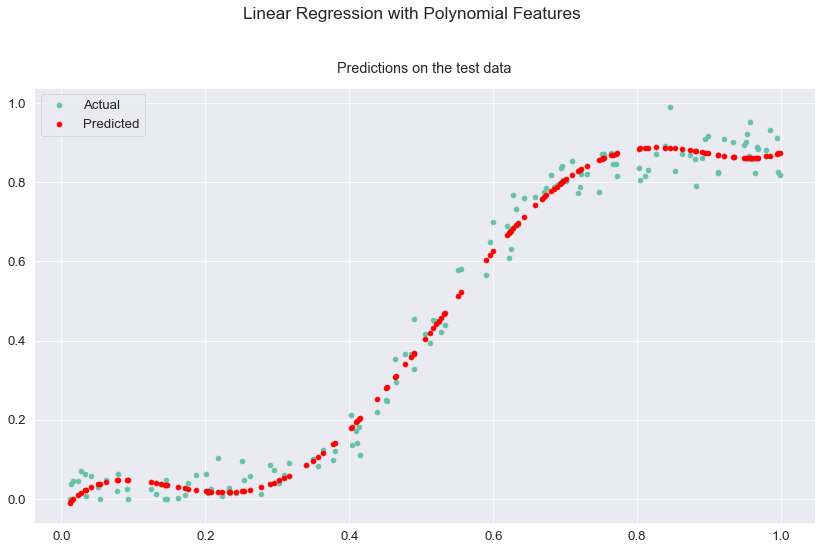

In [17]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Linear Regression with Polynomial Features", y=1.02)
ax.set_title("Predictions on the test data",y=1.02)

# Plot actual test data and predictions.
ax.scatter(speed_test, power_test, label="Actual")
ax.scatter(speed_test, y_test_pred, c="red", label="Predicted")

# Show legend.
plt.legend(loc='upper left')

# Show the plot.
plt.show()

<br>

#### .  <a name=""></a>
___


<br>

#### Neural Networks.  <a name="nn"></a>
___

> [6] [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256)

In [18]:
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)
print(X_poly.shape)

(477, 6)


In [19]:
from tensorflow.keras.layers import BatchNormalization

In [20]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(6,), activation='relu'))
model.add(kr.layers.Dense(1, activation='linear'))
model.compile(optimizer=kr.optimizers.Adam(0.001), loss='mse')

In [21]:
##### Train the neural network on our training data.
model.fit(X_poly, y, epochs=130)

Epoch 1/130
15/15 [==============================] - 1s 4ms/step - loss: 0.1320
Epoch 2/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 3/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0324
Epoch 4/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0266
Epoch 5/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 6/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 7/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 8/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0165
Epoch 9/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0151
Epoch 10/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 11/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 12/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 13/130
15/15 [=================

15/15 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 102/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 103/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 104/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 105/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 106/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 107/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 108/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 109/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 110/130
15/15 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 111/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 112/130
15/15 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 113/130
15/15 [=========

In [22]:
y_nn_pred = model.predict(X_poly)

# Calculate mse.
print("MSE: ", mean_squared_error(y,y_nn_pred))
print("Score:", r2_score(y,y_nn_pred ))

MSE:  0.0013692318150355625
Score: 0.9895841199671496


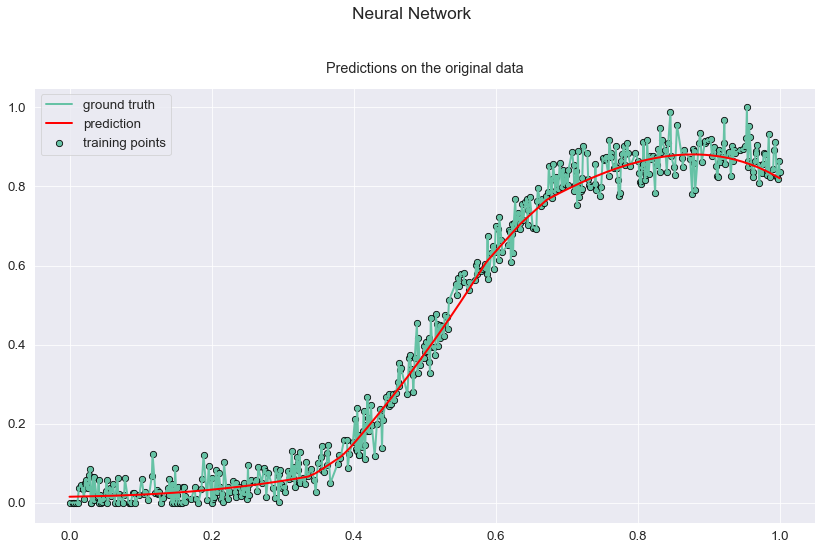

In [23]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Neural Network", y=1.02)
ax.set_title("Predictions on the original data",y=1.02)

# Plot training points and line connecting them.
ax.plot(X_poly[:, 1], y, linewidth=2, label="ground truth")
ax.scatter(X_poly[:, 1], y, s=40, edgecolors="black", label="training points")

# Plot predictions.
ax.plot(X_poly[:, 1], y_nn_pred, c="r", linewidth=2, label='prediction')
    
# Show legend.
plt.legend(loc='upper left')

# Show the plot.
plt.show()

In [24]:
# Split data on training and test (add random state so the outputs are the same after each execution).
speed_train, speed_test, power_train, power_test = tts(X_poly, y, test_size=0.3, random_state=1)
print(f"Training set: {speed_train.shape}, {power_train.shape}")
print(f"Test set: {speed_test.shape}, {power_test.shape}")

Training set: (333, 6), (333, 1)
Test set: (144, 6), (144, 1)


In [25]:
y_nn_test = model.predict(speed_test)

# Calculate mse.
print("MSE: ", mean_squared_error(power_test,y_nn_test))
print("Score:", r2_score(power_test,y_nn_test ))

MSE:  0.0014002181470589292
Score: 0.9893170684516343


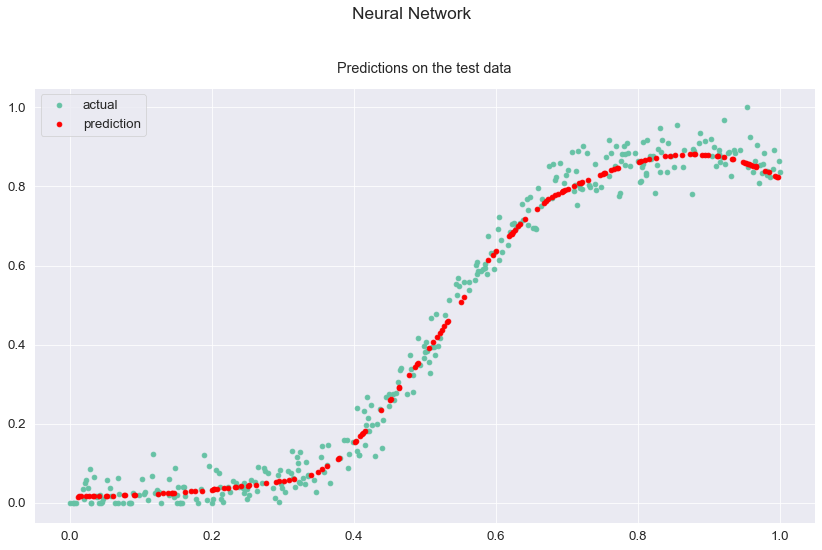

In [26]:
# Create a figure, axis and titles.
fig, ax = plt.subplots()
fig.suptitle("Neural Network", y=1.02)
ax.set_title("Predictions on the test data",y=1.02)

# Plot actual test data and predictions.
ax.scatter(speed_train[:, 1], power_train, label='actual')
ax.scatter(speed_test[:, 1], y_nn_test, label='prediction', c="r")

# Show the legend.
plt.legend()

# Show the plot.
plt.show()

<br>

___

### End